#Udemy Courses Analysis Project
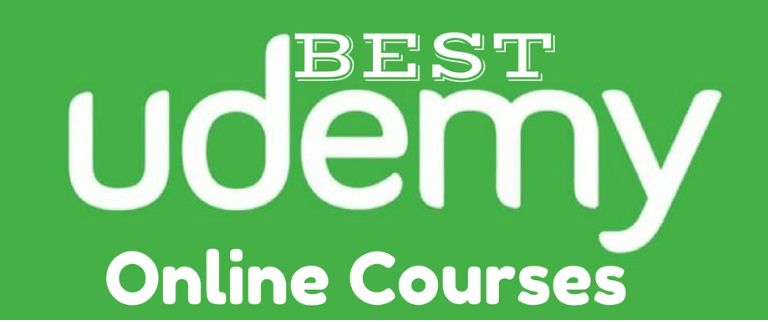


In [ ]:
#@title Import necessary library 
import numpy as np
import pandas as pd

In [ ]:
#@title Read in the datadata Udemy Courses Dataset
linkdata = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSsI1g_g-snpvbsu6DY12O6bd9hVLLPIzv9RQqkXhv30v2W76LWtTRYfWsyX38DSA-HNV9RsMthQYs9/pub?gid=1598407450&single=true&output=csv"
df = pd.read_csv(linkdata)

##Explore and clean the data

In [ ]:
#@title Overview
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [ ]:
#@title Glimpse of the data
print(df.shape)
df.info()

(3678, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   object 
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3669 non-null   object 
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 344.9+ KB


**Note:** The data type of some columns is not quite right. 

In [ ]:
#@title Descriptive statistics
df.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,66.049483,3197.150625,156.259108,40.108755,14.961836
std,61.005755,9504.117010,935.452044,50.383346,659.519974
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.000000,4.000000,15.000000,1.000000
50%,45.000000,911.500000,18.000000,25.000000,2.000000
75%,95.000000,2546.000000,67.000000,45.750000,4.500000
max,200.000000,268923.000000,27445.000000,779.000000,40000.000000


**Note:** There seems to be some value outliers. 

In [ ]:
#@title Count number of missing values in Udemy Courses Dataset
sum_nulls = df.isna().sum().sum()
print("%d null/na values in the dataset" % sum_nulls)
# Check the column have null data
df.isna().sum()

9 null/na values in the dataset


course_id              0
course_title           0
url                    0
is_paid                9
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [ ]:
# Check missing values
df[df["is_paid"].isna()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
290,283780,Build a DCF Model from Scratch,https://www.udemy.com/build-a-dcf-model/,NaN,0,4653,395,5,All Levels,0.516667,2014-09-14T21:13:26Z,Business Finance
291,52118,"Multiply your returns using 'Value Investing"",...",https://www.udemy.com/weekly-forex-analysis-by...,NaN,0,3035,12,14,All Levels,1.500000,2016-06-20T21:02:36Z,Business Finance
3612,576722,Simple And Easy: Wordpress For Beginners,https://www.udemy.com/simple-and-easy-wordpres...,NaN,0,5014,196,32,Beginner Level,3.000000,2015-08-09T23:12:40Z,Web Development
3613,811452,Create Website from scratch in Urdu & Hindi,https://www.udemy.com/create-website-from-scra...,NaN,0,3033,91,9,Intermediate Level,1.000000,2016-06-05T15:48:54Z,Web Development
3633,264790,How to Install WordPress From Scratch,https://www.udemy.com/install-wordpress/,NaN,0,8415,56,13,Beginner Level,1.000000,2014-07-19T23:03:39Z,Web Development
3638,155640,Building a Search Engine in PHP & MySQL,https://www.udemy.com/creating-a-search-engine...,NaN,0,10110,379,12,All Levels,2.500000,2014-02-03T18:07:52Z,Web Development
3643,366720,CSS Image filters - The modern web images colo...,https://www.udemy.com/super-awesome-images-wit...,NaN,0,6315,53,16,All Levels,1.500000,2014-12-10T19:43:40Z,Web Development
3651,1079078,Drupal 8 Site Building,https://www.udemy.com/drupal-8-site-building/,NaN,0,1942,23,48,All Levels,4.500000,2017-05-02T05:15:52Z,Web Development
3665,21386,Beginner Photoshop to HTML5 and CSS3,https://www.udemy.com/psd-html5-css3/,NaN,0,73110,1716,22,All Levels,2.000000,2012-07-27T12:54:57Z,Web Development


In [ ]:
#@title Fill null data
# Check the status of is_paid that have the same 0 price
df1=df[df["price"] == 0]
df1["is_paid"].unique()
#@markdown All course that have 0 price have False status in is_paid column so we replace null data in is_paid column with False.

array([False, nan], dtype=object)

In [ ]:
#Fill null data 
df["is_paid"].fillna("False",inplace=True)

In [ ]:
#Check missing values again
sum_nulls = df.isna().sum().sum()
print("%d null/na values in the dataset" % sum_nulls)

0 null/na values in the dataset


In [ ]:
#@title Unique Categories columns in Udemy Courses Dataset
print("Subjects Categories: ",df["subject"].unique())
print("Level Categories: ",df["level"].unique())

Subjects Categories:  ['Business Finance' 'Business Ffinance' 'Graphic  Design' 'Graphic Design'
 'Musical Instruments' 'Musical Instrument' 'Web Development']
Level Categories:  ['All Levels' 'Intermediate Level' 'Beginner Level' 'Expert Level']


In [ ]:
#Change the categories to correct format for each column 
df["subject"].replace({"Business Ffinance": "Business Finance", "Graphic  Design": "Graphic Design", "Musical Instrument": "Musical Instruments"}, inplace=True)

In [ ]:
#Check again
print("Subjects Categories: ",df["subject"].unique())

Subjects Categories:  ['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']


In [ ]:
#@title Check  course_id unique values
df["course_id"].describe()

count      3678
unique     3673
top       28295
freq          2
Name: course_id, dtype: object

In [ ]:
# Check if course_id contains only numbers
is_numeric = df["course_id"].str.isnumeric().all()
print(is_numeric)

False


In [ ]:
# Remove all letter in the values of course_id column
df["course_id"] = df["course_id"].str.replace('[a-zA-Z]', '')

<ipython-input-16-bbbf2c275ce0>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["course_id"] = df["course_id"].str.replace('[a-zA-Z]', '')


In [ ]:
# Check duplicate values
df[df.duplicated(subset="course_id", keep=False)]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
453,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
454,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
463,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
778,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1234,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design


In [ ]:
#Drop the duplicate values in course_id column
df.drop_duplicates(subset="course_id", keep="first", inplace=True)

In [ ]:
#@title Sets the "course_id" column as the index of the DataFrame
df.set_index("course_id", inplace=True)
df.head(5)

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


## Create a new csv file after clean

In [ ]:
# Save as a csv file
df.to_csv("Udemy_courses.csv", index=True)